In [1]:
from bs4 import BeautifulSoup as BS
import requests
import re

estación = "IQUERETA30"
año      = 2020
mes      = 12
día      = 20

día = str(día).zfill(2)
mes = str(mes).zfill(2)
url = f"https://www.wunderground.com/dashboard/pws/{estación}/table/{año}-{mes}-{día}/{año}-{mes}-{día}/daily"
html  = requests.get(url).text
soup  = BS(html,"lxml")

In [2]:
tabla    = soup.find_all("script")[9]
json_txt = re.findall(">.+",str(tabla))[0][1:-9]

In [3]:
GHI = re.findall("solarRadiationHigh&q;:[0-9]+\.*[0-9]*",json_txt)
GHI = [int(valor[22:]) for valor in GHI]

UV = re.findall("uvHigh&q;:[0-9]+\.*[0-9]*",json_txt)
UV = [float(valor[10:]) for valor in UV]

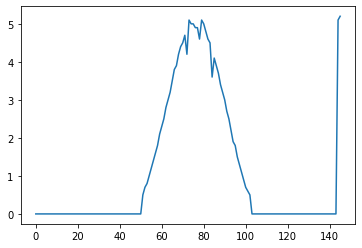

In [4]:
import matplotlib.pyplot as plt

plt.plot(UV)

In [5]:
import lib.libWU as wu
import numpy as np

lista_dias = np.linspace(0,363,15)
lista_dias = np.floor(lista_dias).astype(int)

df = wu.descarga_lugar(estación=estación,año=año,lista_num_dias=lista_dias,latitud=20.66,longitud=-99.90)

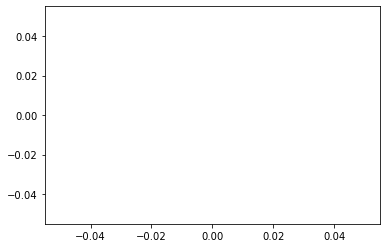

In [18]:
clear = df["Clearsky GHI"].values[i*300:(i+1)*300]
ghi   = df["GHI"].values[i*300:(i+1)*300]


plt.plot(clear)
plt.plot(ghi)

In [7]:
df

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Clearsky DNI,ClearSky DHI,UV,Clearsky DHI
0,2020,1,1,6,0,0,0.0,0.0,NaN,0.0,0.0
1,2020,1,1,6,10,0,0.0,0.0,NaN,0.0,0.0
2,2020,1,1,6,20,0,0.0,0.0,NaN,0.0,0.0
3,2020,1,1,6,30,0,0.0,0.0,NaN,0.0,0.0
4,2020,1,1,6,40,0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2048,2020,12,30,5,30,0,0.0,0.0,NaN,0.0,0.0
2049,2020,12,30,5,40,0,0.0,0.0,NaN,0.0,0.0
2050,2020,12,30,5,50,0,0.0,0.0,NaN,0.0,0.0
2051,2020,12,30,5,50,691,0.0,0.0,NaN,5.5,0.0
